In [2]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

In [4]:
import imageio

## Exercises

1. Load and display the image 'dog.jfif'. Save the image in png format.
2. *Suggest 2 ways and write codes to display 2 images simultaneously.* You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.
3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"
4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear interpolation
   2) Cubic interpolation
   3) Nearest neighbor interpolation.

Perform profiling on each method. Comment on the **execution times** and **quality of resulting images**.

In [10]:
# 1
img = cv.imread("images/dog.jfif") # read dog.jfif image
cv.imshow("dog", img) # display dog.jfif image
cv.waitKey(0) # wait for user to respond
cv.destroyAllWindows() # close all window
cv.imwrite("dog.png", img) # save as dog.png image

True

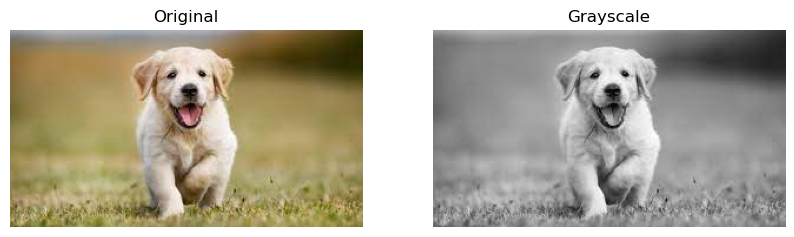

In [60]:
# 2
img = cv.imread("images/dog.jfif")
#first method, using opencv
from utils import display_image
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # change image to grayscale image

#cv.imshow(('Original','Grayscale'),[img,gray_img])
cv.imshow("Original",img) # display original image
display_image("Grayscale",gray_img) # display grayscale image

#second method, using matplotlib.pyplot
import matplotlib.pyplot as plt
gray_image = cv.imread("images/dog.jfif", 0) # read file and set to grayscale

plt.figure(figsize=(10,5)) #display original and grayscale images

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

cv.waitKey(0)
cv.destroyAllWindows()

In [36]:
# 3
cap = cv.VideoCapture("videos/img_pexels.mp4") # create VideoCapture object

if not cap.isOpened(): # check if object created successfully
    sys.exit("Invalid video path.")

fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 24

width = int(cap.get(3))//2
height = int(cap.get(4))//2

out = cv.VideoWriter("smaller_img_pexels.avi", fourcc, fps, (width, height)) # save object

# read and display frame
while cap.isOpened():
    ret, frame= cap.read() # read method return status and frame

    if not ret:
        print("frame not received")
        break
    
    resized_frame = cv.resize(frame, (width , height))
    # cv.imshow("img_pexels", frame)
    cv.namedWindow("smaller_img_pexels", cv.WINDOW_NORMAL)
    cv.imshow("smaller_img_pexels", resized_frame)

    out.write(resized_frame)

    if cv.waitKey(1) & 0xFF == 27: #press esc key to exit
        break

cap.release() # destroy the cap object
out.release()
cv.destroyAllWindows()

In [133]:
# 4
import time
# Linear interpolation
# faster than cubic interpolation but slower than nearest neighbor interpolation
# smoother edges photo compare to nearest neighbor interpolation, 
# but still lack of sharpness along edges
img = cv.imread('images/dog.jfif')

start_time = time.time()
img_resize_linear = cv.resize(img, None, fx=5, fy=5, interpolation=cv.INTER_LINEAR)
linear_time = time.time() - start_time

cv.imshow('linear', img_resize_linear)

#Cubic interpolation
# slowest execution time
# highest quality image, smoother edges and less pixelation
start_time = time.time()
img_resize_cubic = cv.resize(img, None, fx=5, fy=5, interpolation=cv.INTER_CUBIC)
cubic_time = time.time() - start_time

cv.imshow('cubic', img_resize_cubic)

# Nearest neighbor interpolation
# fastest execution time
# pixelated, lower-quality image
start_time = time.time()
img_resize_nearest = cv.resize(img, None, fx=5, fy=5, interpolation=cv.INTER_NEAREST)
nearest_time = time.time() - start_time

cv.imshow('nearest neighbor', img_resize_nearest)

cv.waitKey(0)
cv.destroyAllWindows()

print(f"Linear Interpolation Time: {linear_time:.10f} seconds")
print(f"Cubic Interpolation Time: {cubic_time:.10f} seconds")
print(f"Nearest Neighbor Interpolation Time: {nearest_time:.10f} seconds")

Linear Interpolation Time: 0.0019936562 seconds
Cubic Interpolation Time: 0.0039889812 seconds
Nearest Neighbor Interpolation Time: 0.0009973049 seconds


## Execution Times:
1. Nearest Neighbor Interpolation
2. Linear Interpolation
3. Cubic Interpolation

### Explanation:
Cubic Interpolation is the slowest due to its computational complexity, Linear Interpolation is faster than Cubic Interpolation but slower than Nearest Neighbor Interpolation, Nearest Neighbor Interpolation is the fastest in term of execution time

## Quality of resulting images:
1. Linear Interpolation - 
   smoother edges photo compare to nearest neighbor interpolation, but still lack of sharpness along edges
2. Cubic Interpolation - highest quality image, smoother edges and less pixelation

3. Nearest Neighbor Interpolation - pixelated, lower-quality image